In [385]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
import plotly.graph_objs as go
import plotly.express as px
%matplotlib inline

In [386]:
# Needed encoding option, or error thrown:
# 'UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 0-1: invalid continuation byte'
df = pd.read_csv('megastore_sales.csv', encoding = 'latin')

In [387]:
df.head(2)

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Salesperson,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,CA-2016-152156,08/11/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,CA-2016-152156,08/11/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820


# 1.	Clean up the data by dropping any rows with missing values.

In [388]:
# Using dropna to remove null values
df.dropna().head(2)

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Salesperson,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,CA-2016-152156,08/11/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,CA-2016-152156,08/11/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820


# 2.	List the Top 5 salespeople in Sales according to each segment.

In [389]:
# Pulling sales out of the dataframe, grouping by segment, get the 5 highest sales values
topFiveSalesPerSegment = df['Sales'].groupby(df['Segment']).nlargest(5)

# Merge our sales/segments with the columns we're interested in, so we can find out the names of the salespeople
# Including 'sales' again because a merge needs a column 'in common' between the two being merged
topFiveSalesPeoplePerSegment = pd.merge(topFiveSalesPerSegment, df[['Sales', 'Segment', 'Salesperson']], on="Sales")
topFiveSalesPeoplePerSegment

,Sales,Segment,Salesperson
0,13999.960,Consumer,Sean Braxton
1,10499.970,Consumer,Dean Katz
2,9892.740,Consumer,Erin Smith
3,9449.950,Consumer,Sanjit Chand
4,8749.950,Consumer,Lena Radford
5,17499.950,Corporate,Justin Ellison
6,9099.930,Corporate,Tracy Blumstein
7,7999.980,Corporate,Ken Brennan
8,5199.960,Corporate,Kristen Hastings
9,5083.960,Corporate,Victoria Brennan


# 3.	Create a calculated column called ‘Price’ (=Sales / Quantity) for each product.

In [390]:
# We can add a column to a pandas dataset like so
df['Price'] = df.Sales / df.Quantity

df.head(4)

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Salesperson,Segment,Country,City,State,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Price
0,CA-2016-152156,08/11/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,130.9800
1,CA-2016-152156,08/11/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,243.9800
2,CA-2016-138688,12/06/2016,16/06/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,...,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,7.3100
3,US-2015-108966,11/10/2015,18/10/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,...,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,191.5155


# 4.	Show the sum of ‘Profit’ for each region (highest first) (use .agg method).

In [391]:
# agg lets us apply a method on each element in a series individually, so we get the sum of each region's profits
# using groupby, allows us to group a dataframe based on some column
profitRegion = df.Profit.groupby(df['Region']).agg(['sum']).sort_values('sum', ascending=False)
profitRegion

,sum
Region,
West,108418.4489
East,91522.7800
South,46749.4303
Central,39700.1417


# 5.	Using groupby, display the top 3 sales for each category and subcategory.

In [392]:
# Group by category and sub-category, pull sales from this and select only the 3 largest sales values
df.groupby(['Category','Sub-Category'])['Sales'].nlargest(3)

Category         Sub-Category      
Furniture        Bookcases     9741     4404.900
                               5917     4228.704
                               6535     4007.840
                 Chairs        7243     4416.174
                               9425     3785.292
                               5170     3504.900
                 Furnishings   7387     1336.440
                               7458     1196.860
                               638      1049.200
                 Tables        9639     4297.644
                               1246     3610.848
                               9857     3393.680
Office Supplies  Appliances    7579     2625.120
                               7937     2518.290
                               3443     2504.740
                 Art           67       1113.024
                               1510      385.600
                               4851      303.840
                 Binders       9039     9892.740
                               40

# 6.	Using a pivot table, show the sum and mean of ‘Sales’ in terms of Profit and Category and Shipped.

In [393]:
# A pivot table is useful for summarising large datasets
# It's like a more customisable version of groupby
# Selecting the columns we're interested in as index, populating values with sales totals and running both mean and sum agg functions on them

# Here the mean and sum are the same, as the table only involves one numerical column...
table = df.pivot_table(
    values=['Sales'],
    index=['Profit', 'Category', 'Ship Date'],
    aggfunc=['mean', 'sum'],
    margins=True)

table

,,,mean,sum
,,,Sales,Sales
Profit,Category,Ship Date,,
-6599.978,Technology,02/12/2016,4499.985000,4.499985e+03
-3839.9904,Technology,04/11/2017,7999.980000,7.999980e+03
-3701.8928,Office Supplies,30/07/2014,2177.584000,2.177584e+03
-3399.98,Technology,23/04/2017,2549.985000,2.549985e+03
-2929.4845,Office Supplies,13/12/2017,1889.990000,1.889990e+03
...,...,...,...,...
4946.37,Office Supplies,21/12/2016,9892.740000,9.892740e+03
5039.9856,Technology,22/11/2017,10499.970000,1.049997e+04


# 7.	Find the Technology Accessories sold in New York City worth more than $300 and sold by Nathan Mautz in 2014.

In [394]:
# We can use loc to access a particular row in a dataframe by providing index and column values
technologyNY = df.loc[(df['Category'] == 'Technology') & (df['City'] == 'New York City') & (df['Salesperson'] == 'Nathan Mautz')\
                      & (df['Price'] > 300)]
technologyNY.head(5)

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Salesperson,Segment,Country,City,State,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Price
318,CA-2014-164973,04/11/2014,09/11/2014,Standard Class,NM-18445,Nathan Mautz,Home Office,United States,New York City,New York,...,East,TEC-MA-10002927,Technology,Machines,Canon imageCLASS MF7460 Monochrome Digital Las...,3991.98,2,0.0,1995.99,1995.99


# 8.	Find all the products with ID #TEC-PH-10003273 in the ‘Home office’ segment that were shipped ‘Second class’ in 2014.

In [395]:
# Using 'in' operator to find dates in 2014
df2 = df.loc[(df['Product ID'] == 'TEC-PH-10003273') & (df['Segment'] == 'Home Office') & (df['Ship Mode'] == 'Second Class')\
            & (2014 in df['Ship Date'])]

df2

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Salesperson,Segment,Country,City,State,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Price
182,CA-2014-158274,19/11/2014,24/11/2014,Second Class,RM-19675,Robert Marley,Home Office,United States,Monroe,Louisiana,...,South,TEC-PH-10003273,Technology,Phones,AT&T TR1909W,503.96,4,0.0,131.0296,125.99


# 9.	Any sales visualisation (graph) that you think would help the MegaStore management to interpret their sales data better.

<Figure size 1080x1080 with 0 Axes>

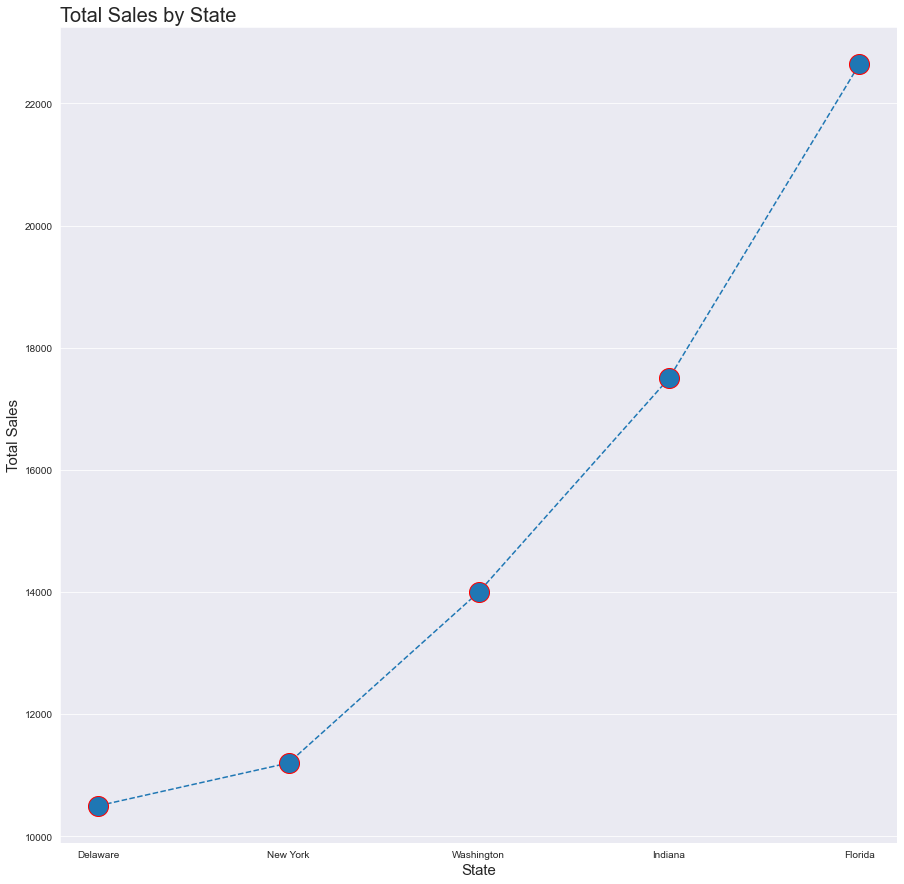

In [396]:
# Top 5 sales values by state
df_product = df[['Sales','State']].nlargest(5, 'Sales')

# mec sets the colour of the marker's outline/edge
plt.figure(figsize=(15,15))

f = plt.figure()
# Loc dictates position of title
plt.title('Total Sales by State', fontsize=20, loc='left')
plt.xlabel('State', fontsize=15)
plt.ylabel('Total Sales', fontsize=15)
# Showing only horizontal grid lines
plt.grid(axis = 'x')

f.set_figwidth(15)
f.set_figheight(15)

# Sum and sort our sales values
topSalesByState = df_product.groupby(['State']).sum().sort_values('Sales', ascending=True)
plt.plot(topSalesByState, marker='o', ms= 20, mec='r', linestyle='dashed')

# The visualisation suggests that sales are highest in Florida, indicating the business would benefit from increased investment in its Florida branch. Conversely, sales in Delaware are very low, maybe incurring unnecessary costs. It could benefit the business to close down their Delaware branch.

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

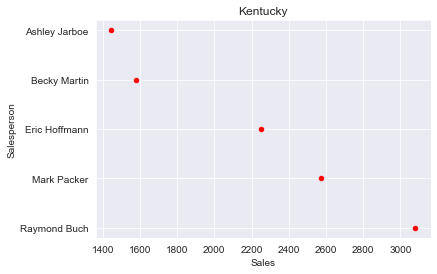

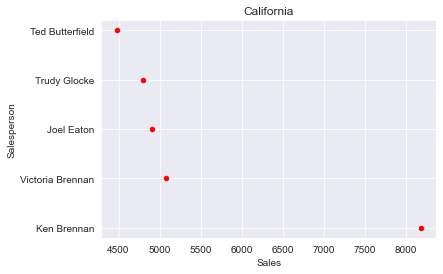

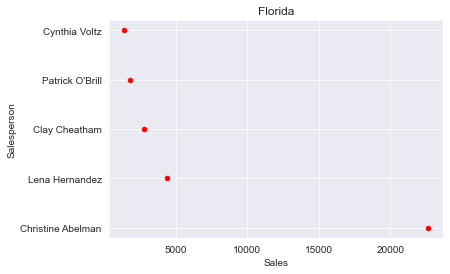

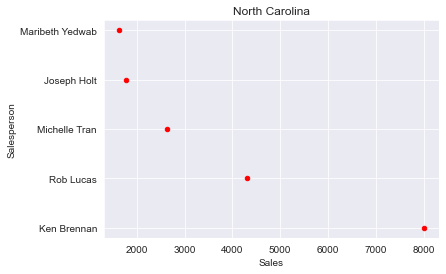

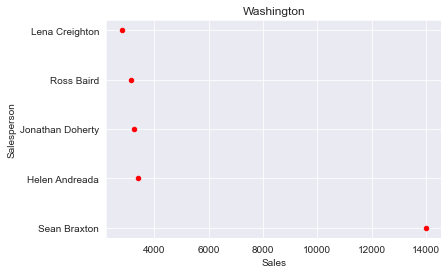

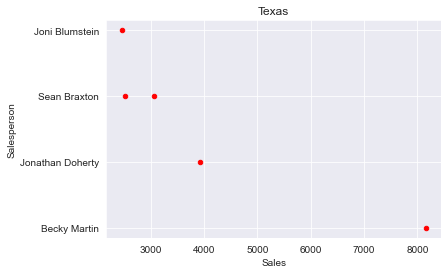

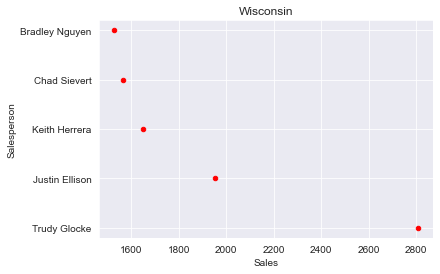

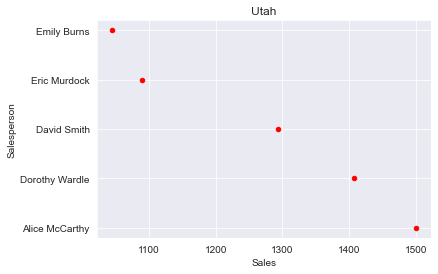

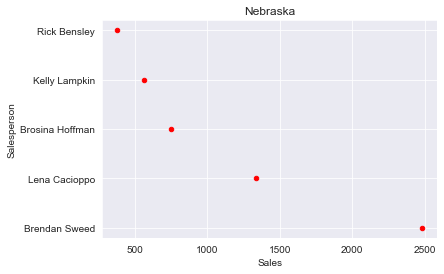

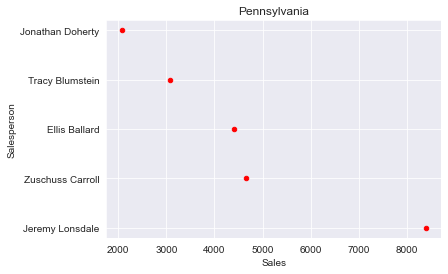

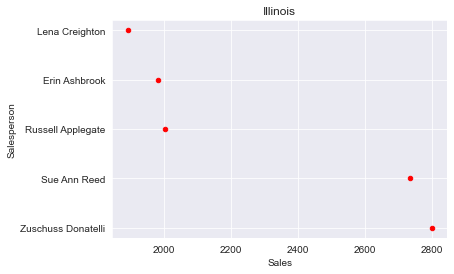

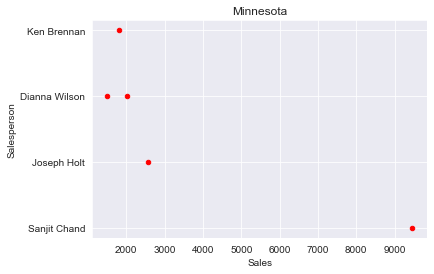

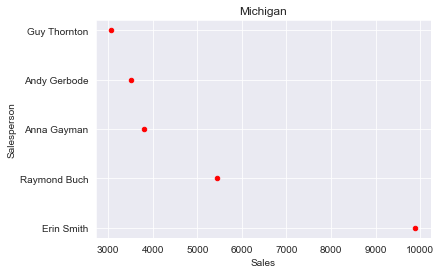

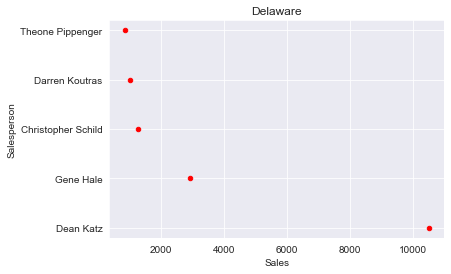

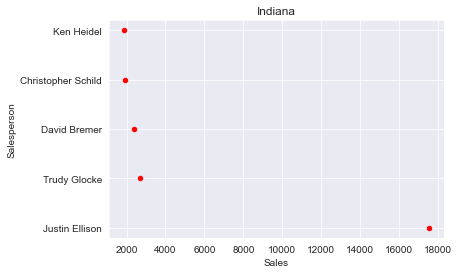

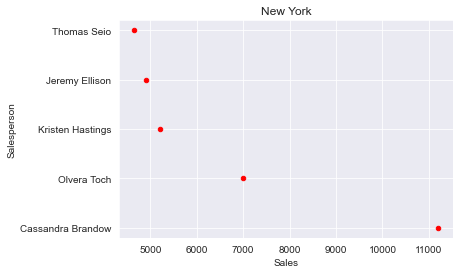

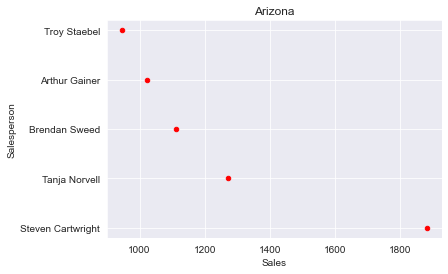

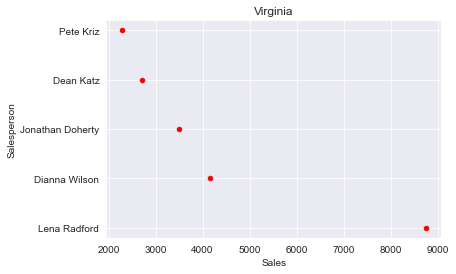

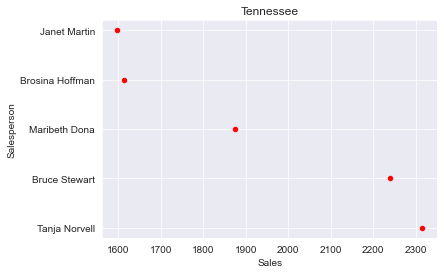

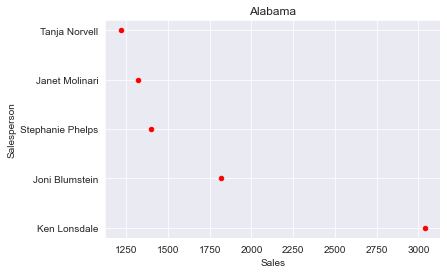

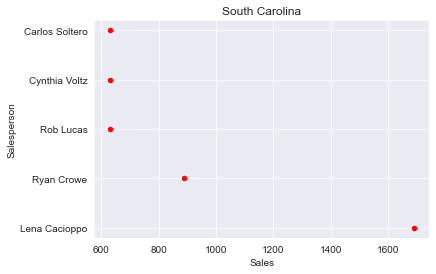

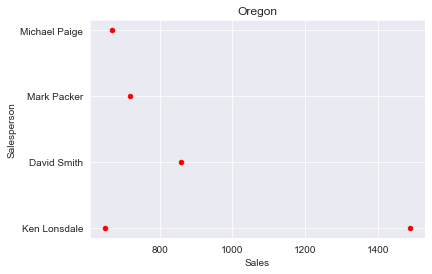

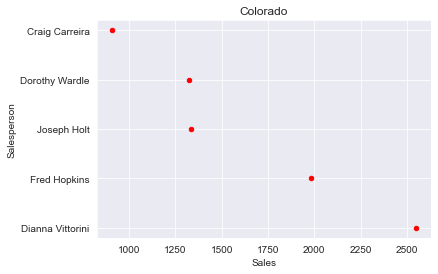

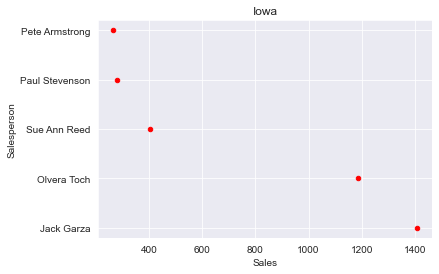

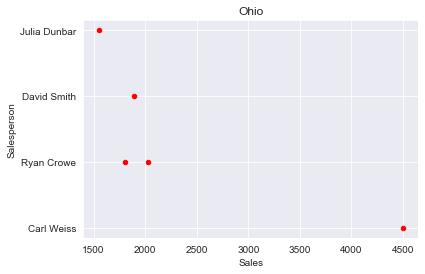

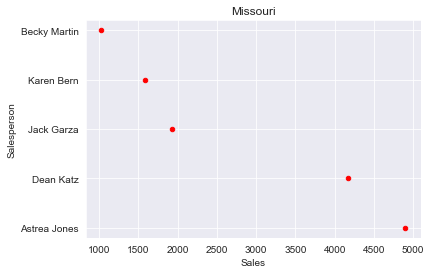

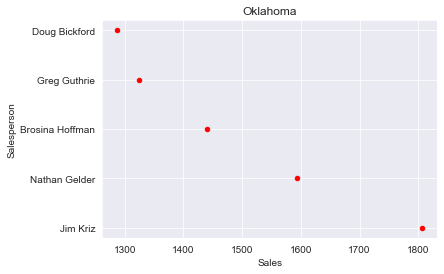

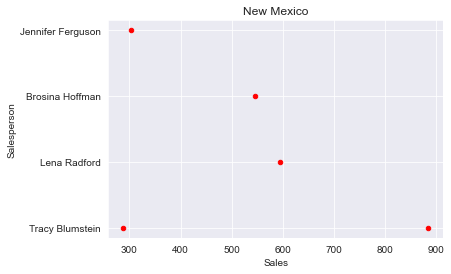

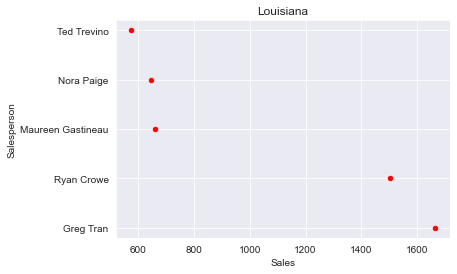

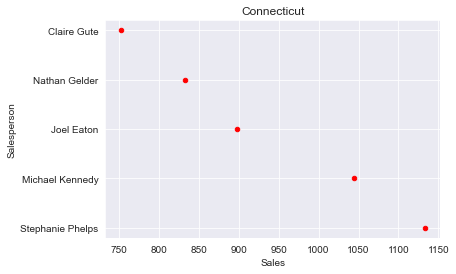

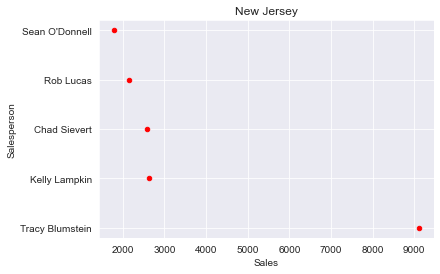

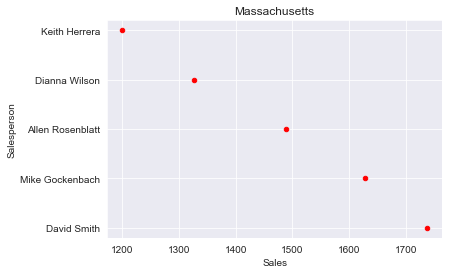

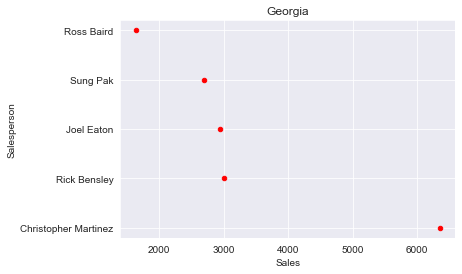

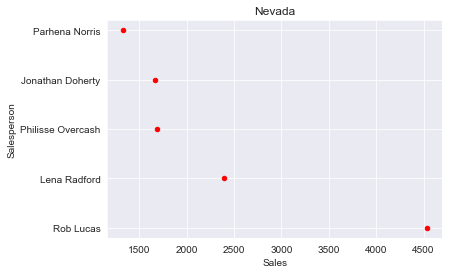

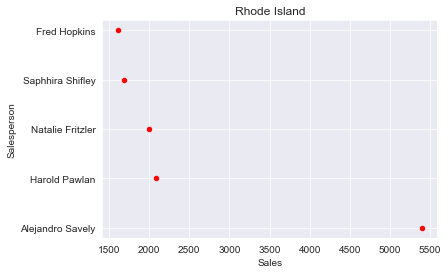

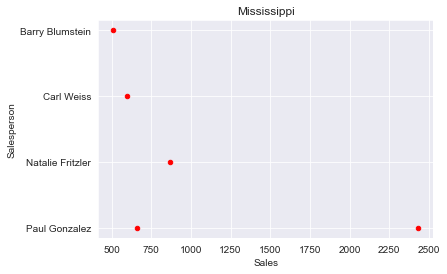

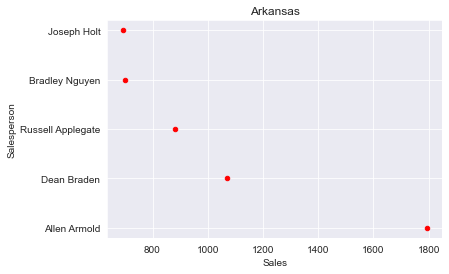

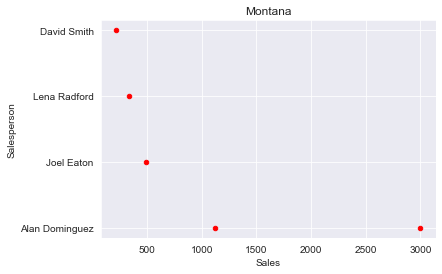

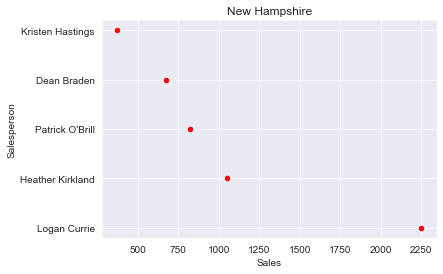

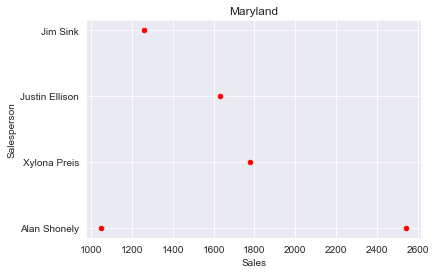

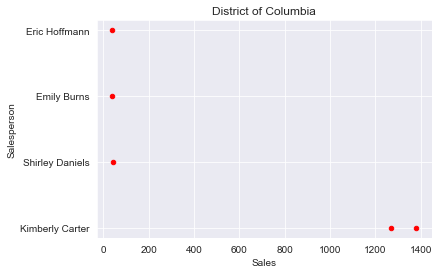

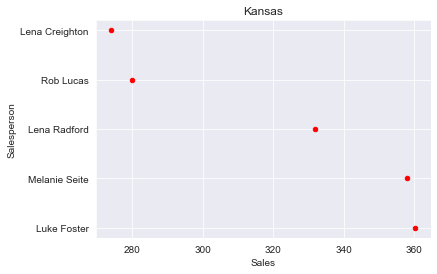

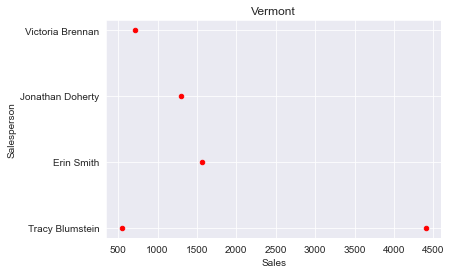

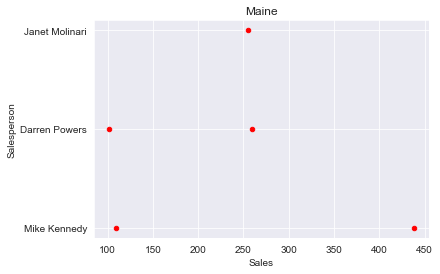

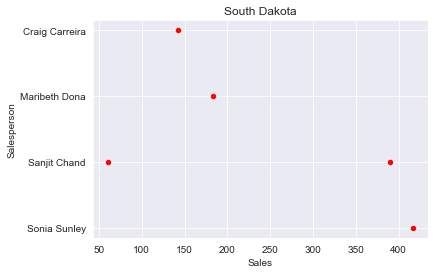

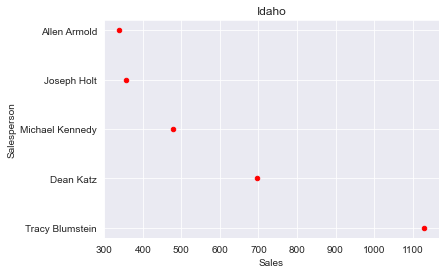

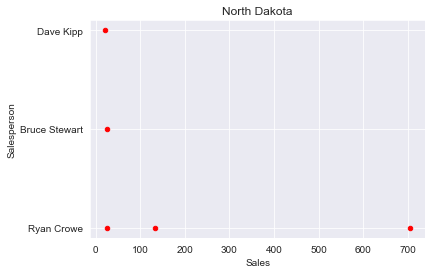

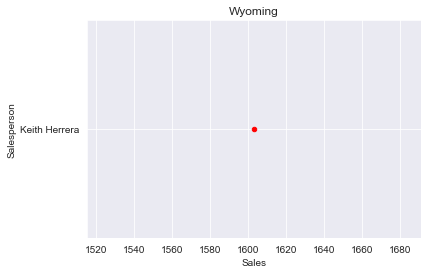

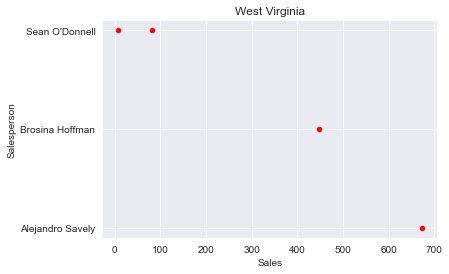

In [413]:
#plot a scatterplot for Sales & Salespeople by State.

# Pulling out the top 5 salespeople
salesPeopleAndSales = df[['Sales', 'Salesperson']].sort_values('Sales', ascending=False).drop_duplicates()
states = df['State'].drop_duplicates()

def getTopSalesPeopleByState():
    for state in states:
        current_state = df[df['State'] == state]


        current_state[['Sales', 'Salesperson']].nlargest(5, 'Sales').plot(kind='scatter', x='Sales', y='Salesperson', color='red', title=state)


# This method will iterate through all states, showing us the top 5 salespeople and their salesote
getTopSalesPeopleByState()


# Salespeople in Delaware generally have sales values under $2000, while salespeople in Florida are all above $5000

# Sales in Delaware may be improved with further training for their salespeople.